In [18]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv',index_col=[0])

In [19]:
df.head(10)

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,ram_in_gb,ddr_version,processor_name,gen_type,OS,disk_drive,storage_in_gb,size_in_inches,touchscreen,company,graphic_card
0,Primebook 4G Android Based MediaTek MT8788 - (...,Intel Core i3 Processor (11th Gen),4 GB DDR4 RAM,Prime OS Operating System,512 GB SSD,29.46 cm (11.6 Inch) Display,1 Year Onsite Warranty,"16,990",4,4,Intel,10,Windows,SSD,512,11.6,No,Primebook,No
1,Primebook 4G Android Based MediaTek MT8788 - (...,Intel Core i5 Processor (11th Gen),4 GB DDR4 RAM,Prime OS Operating System,512 GB SSD,29.46 cm (11.6 Inch) Display,1 Year Onsite Warranty,"18,990",4,4,Intel,10,Windows,SSD,512,11.6,No,Primebook,No
2,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,"38,990",8,4,Intel,10,Windows,SSD,512,15.6,No,Asus,No
3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,"47,990",8,4,AMD,Not Mentioned,Windows,SSD,1000,15.6,No,Asus,No
4,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"38,990",8,4,Intel,10,Windows,SSD,256,14.0,No,HP,No
5,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"65,990",8,4,AMD,Not Mentioned,Windows,SSD,1000,15.6,No,Asus,Yes
6,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Mac OS Operating System,512 GB SSD,33.78 cm (13.3 inch) Display,2 Year On-Site & Carry-In Warranty,"79,990",8,4,Intel,10,Mac,SSD,512,13.3,No,Apple,No
7,MSI Katana 15 Core i7 12th Gen - (16 GB/1 TB S...,Intel Core i3 Processor (11th Gen),16 GB DDR5 RAM,Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,"96,990",16,5,Intel,10,Windows,SSD,256,15.6,No,MSI,Yes
8,ASUS Vivobook K15 OLED Ryzen 5 Hexa Core AMD R...,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Domestic Warranty,"58,990",16,4,Intel,10,Windows,SSD,256,15.6,No,Asus,No
9,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,"14 inch 2K QHD, IPS LCD Display ( 400nits peak...",1 Year Onsite Warranty,"35,990",8,4,AMD,Not Mentioned,Windows,SSD,512,14.0,No,Realmebook,No


In [20]:
df['Price'] = df['Price'].str.replace(",","").astype(int)

### 1. Harga  Processor

In [21]:
ram = df.groupby(['processor_name'],as_index=False).sum().sort_values(by='Price',ascending=False)[["processor_name",'Price']].reset_index(drop=True)
ram

C:\Users\User\AppData\Local\Temp\ipykernel_1792\3388223290.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram = df.groupby(['processor_name'],as_index=False).sum().sort_values(by='Price',ascending=False)[["processor_name",'Price']].reset_index(drop=True)


,processor_name,Price
0,Intel,65484999
1,AMD,20791899
2,Microsoft,96657


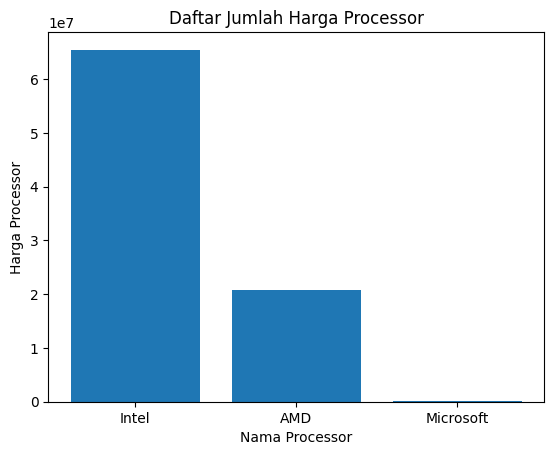

In [5]:
plt.title('Daftar Jumlah Harga Processor')
plt.ylabel('Harga Processor')
plt.xlabel('Nama Processor')
plt.bar(ram['processor_name'],ram['Price'])
plt.show()

### 2. Ram in Gb

In [6]:
ram = df.groupby(['ram_in_gb'],as_index=False).sum().sort_values(by='Price',ascending=False)[["ram_in_gb",'Price']].reset_index(drop=True)
ram

C:\Users\User\AppData\Local\Temp\ipykernel_1792\3166126889.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram = df.groupby(['ram_in_gb'],as_index=False).sum().sort_values(by='Price',ascending=False)[["ram_in_gb",'Price']].reset_index(drop=True)


,ram_in_gb,Price
0,8,44880256
1,16,34254383
2,4,7677332
3,32,4845694
4,2,620960


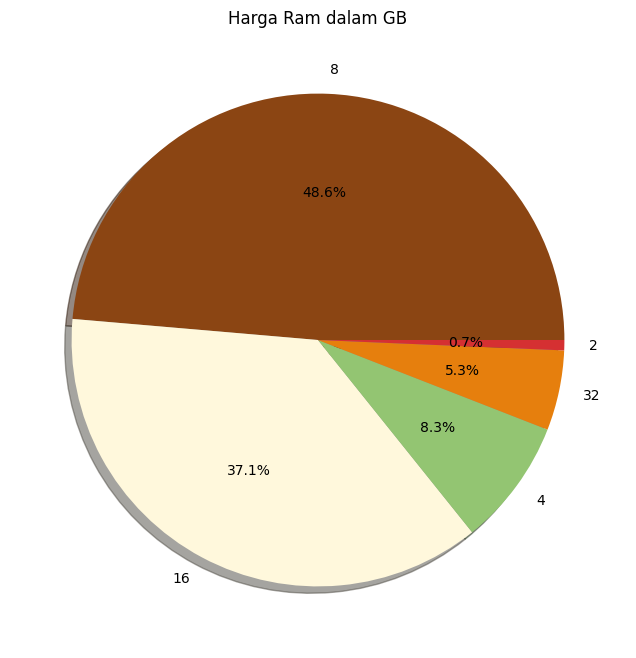

In [7]:
plt.figure(figsize=(12,8))
colors = ('#8B4513','#FFF8DC','#93C572','#E67F0D','#D53032')
plt.title('Harga Ram dalam GB')
plt.pie(
    ram['Price'],
    labels=ram['ram_in_gb'],
    autopct='%1.1f%%',
    colors=colors,
    shadow=True
)
plt.show()

### 3. DDR Version

In [8]:
ram = df.groupby(['ddr_version'],as_index=False).sum().sort_values(by='Price',ascending=False)[["ddr_version",'Price']].reset_index(drop=True)
ram

C:\Users\User\AppData\Local\Temp\ipykernel_1792\3723617434.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram = df.groupby(['ddr_version'],as_index=False).sum().sort_values(by='Price',ascending=False)[["ddr_version",'Price']].reset_index(drop=True)


,ddr_version,Price
0,4,70544014
1,5,17299458
2,3,4232673
3,8,202480


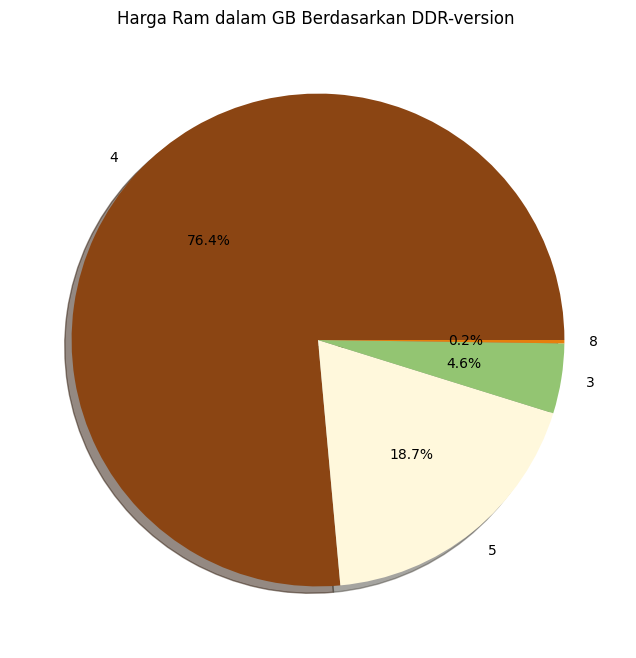

In [9]:
plt.figure(figsize=(12,8))
colors = ('#8B4513','#FFF8DC','#93C572','#E67F0D','#D53032')
plt.title('Harga Ram dalam GB Berdasarkan DDR-version ')
plt.pie(
    ram['Price'],
    labels=ram['ddr_version'],
    autopct='%1.1f%%',
    colors=colors,
    shadow=True
)
plt.show()

### 4 Type generation of processor

In [10]:
ram = df.groupby(['gen_type'],as_index=False).sum().sort_values(by='Price',ascending=False)[["gen_type",'Price']].reset_index(drop=True)
ram.drop(index=[1],axis=0,inplace=True)
ram

C:\Users\User\AppData\Local\Temp\ipykernel_1792\1508485105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram = df.groupby(['gen_type'],as_index=False).sum().sort_values(by='Price',ascending=False)[["gen_type",'Price']].reset_index(drop=True)


,gen_type,Price
0,10,54146640
2,8,5870581
3,9,2321221
4,7,1400854
5,5,202377
6,2,117900
7,3,46990


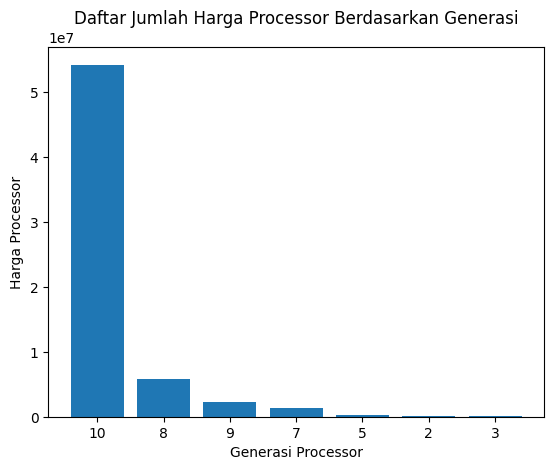

In [11]:
plt.title('Daftar Jumlah Harga Processor Berdasarkan Generasi')
plt.ylabel('Harga Processor')
plt.xlabel('Generasi Processor')
plt.bar(ram['gen_type'],ram['Price'])
plt.show()

### 5. Company laptops prices

In [12]:
ram = df.groupby(['company'],as_index=False).sum().sort_values(by='Price',ascending=False)[["company",'Price']].reset_index(drop=True)
ram.drop(index=[1],axis=0,inplace=True)
ram

C:\Users\User\AppData\Local\Temp\ipykernel_1792\3284233791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram = df.groupby(['company'],as_index=False).sum().sort_values(by='Price',ascending=False)[["company",'Price']].reset_index(drop=True)


,company,Price
0,Asus,29649488
2,Lenovo,9731151
3,MSI,9611287
4,Dell,8770760
5,Apple,5630137
6,Acer,4765089
7,alienware,2037420
8,Spectre,1582987
9,Primebook,1152350
10,Surface,887378


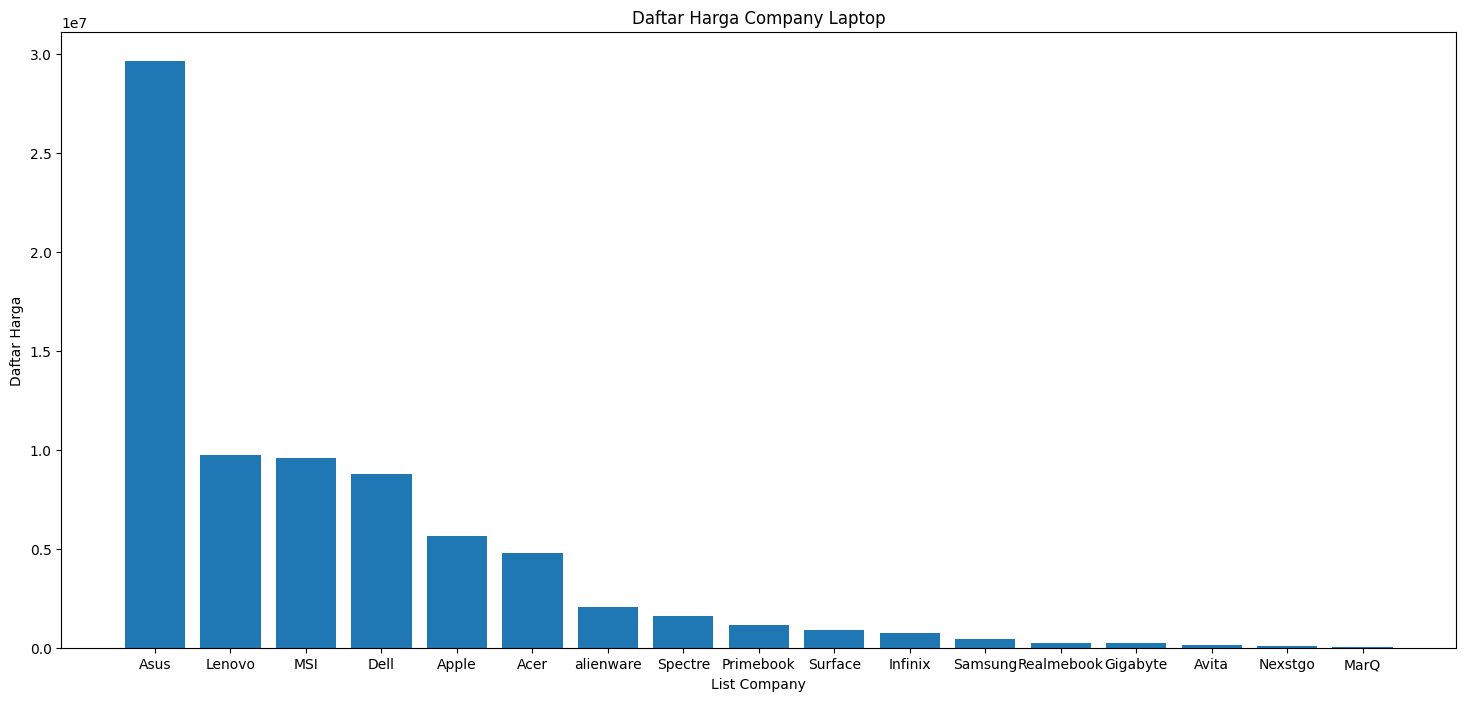

In [13]:
plt.figure(figsize=(18,8))
plt.title('Daftar Harga Company Laptop')
plt.ylabel('Daftar Harga')
plt.xlabel('List Company')
plt.bar(ram['company'],ram['Price'])
plt.show()

### Disk drive with processor corelations


<Axes: xlabel='disk_drive', ylabel='count'>

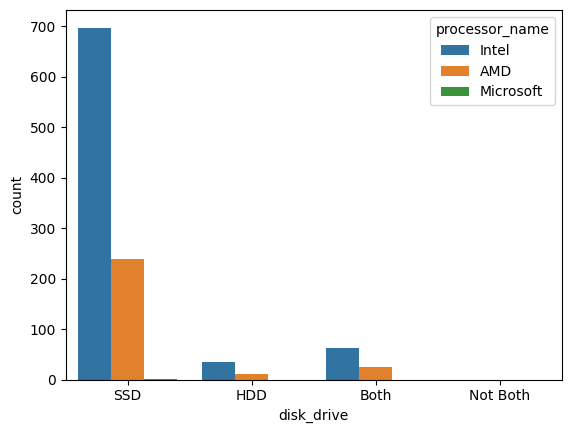

In [26]:
sns.countplot(x="disk_drive", hue="processor_name", data=df)

### Cek outlier

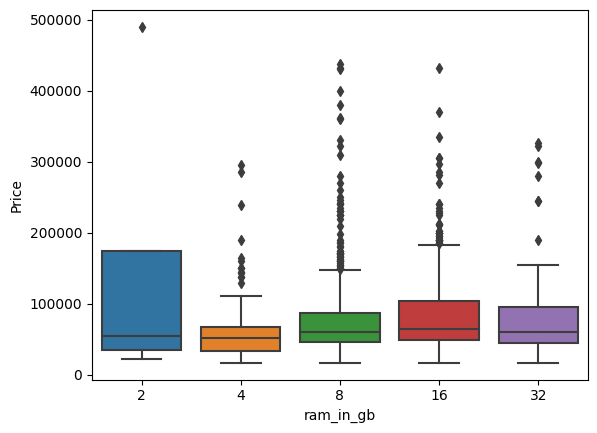

In [28]:
sns.boxplot(x='ram_in_gb',y="Price",data=df)
plt.show()